# __Seaborn Visualization: From Basics to Advanced__

## __Agenda__

- Introduction to Seaborn
- Plotting Graphs Using Seaborn
- Violin Plot
- Pair Plot
- Heatmap
- Joint Plot
- Swarm Plot
- Plotting 3D Graphs for Multiple Columns Using Seaborn
- Introduction to Plotly
- Plotting a Graph Using Plotly
- Scatter Plot
- Box Plot
- Scatter Matrix
- Heatmap

## __1. Introduction to Seaborn__
Seaborn is a Python library for statistical data visualization that builds on Matplotlib.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_05_Data_Visualization/2_Seaborn_Visualization_Basics_to_Advanced/Seaborn.png)
- It provides an interface for creating attractive and informative statistical graphics.
- It comes with several built-in themes and color palettes to make creating aesthetically pleasing visualizations easy.
- It is particularly well-suited for exploring complex datasets with multiple variables.



The below code leverages Seaborn's functionality to create a specialized line plot for visualizing fMRI data with distinct regions and events.
- Seaborn simplifies the process of creating complex visualizations and provides additional features for customization and exploration of data patterns.







In [5]:
# Import
import seaborn as sns

In [6]:
sns.set_theme()
fmri = sns.load_dataset("fmri")

In [7]:
fmri.head(10)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557


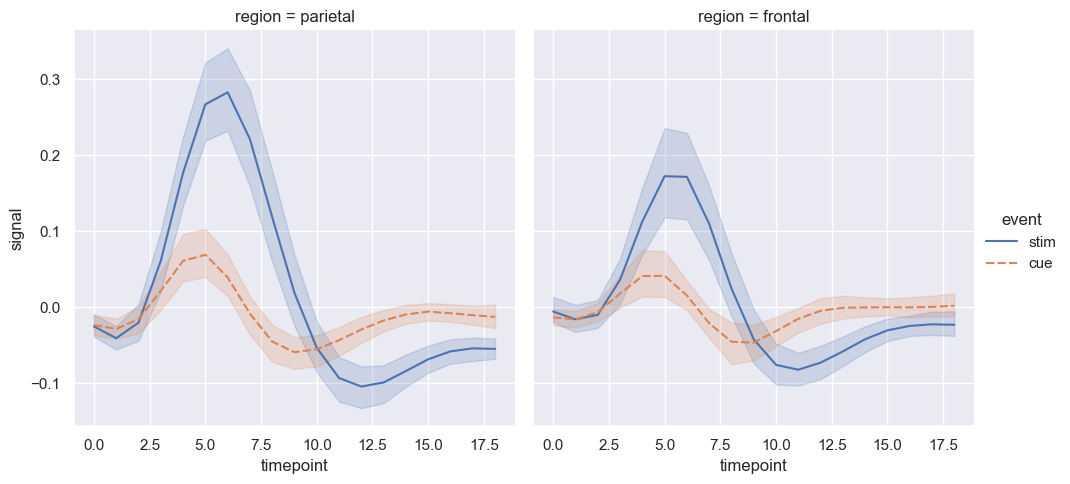

In [8]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

## __2. Plotting Graphs Using Seaborn__

__Note:__ We have previously explored these plot types using the Matplotlib library. This example serves to illustrate how to achieve similar visualizations using Seaborn for its enhanced styling and simplicity.

In [9]:
import matplotlib.pyplot as plt

# Load a sample dataset
tips = sns.load_dataset('tips')

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


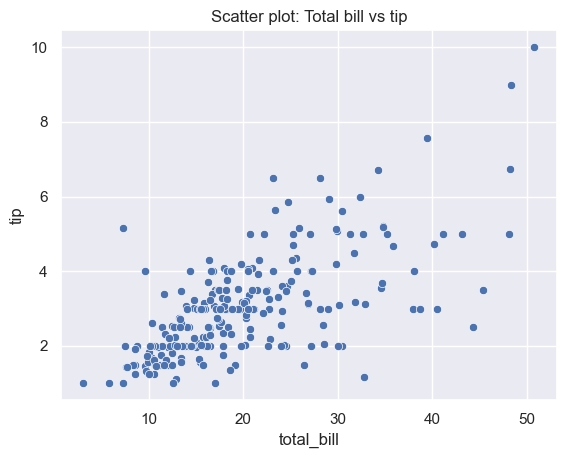

In [7]:
# Scatter Plot: tip vs. total bill
# A scatter used to analyze TWO numerical features simultaneously
sns.scatterplot(data=tips,x='total_bill',y='tip')
plt.title('Scatter plot: Total bill vs tip')
plt.show()

- Based on the scatter plot, you can infer a positive relationship between the total bill and tip amount, indicating that customers tend to tip more when they spend more on their meals.
- There is still variability in tip amounts for a given total bill, suggesting that factors other than the bill amount may also influence the tips customers leave.

In [9]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
tips.shape

(244, 7)

<AxesSubplot: xlabel='day', ylabel='total_bill'>

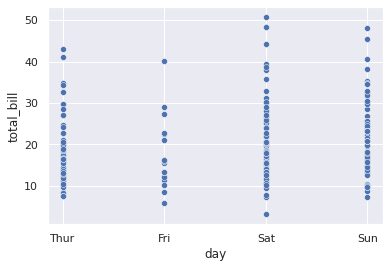

In [12]:
sns.scatterplot(data=tips,x='day',y='total_bill')

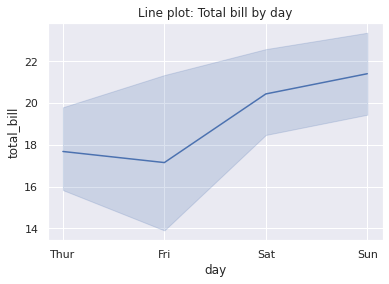

In [13]:
# Line Plot: total bill vs. day
# aggregate over repeated values (each day) to show the mean and 95% confidence interval
sns.lineplot(data=tips,x='day',y='total_bill')
plt.title('Line plot: Total bill by day')
plt.show()

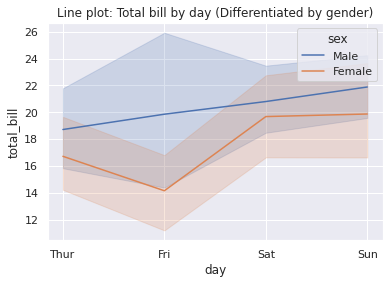

In [14]:
# Line Plot: total bill vs. day, group by gender
sns.lineplot(data=tips,x='day',y='total_bill',hue='sex')
plt.title('Line plot: Total bill by day (Differentiated by gender)')
plt.show()

- The lines on the plot represent the trend of total bill amounts across different days of the week, segmented by gender (male and female).
- Based on the line plot, you can infer that the total bill paid by males is considerably higher than that paid by females.

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


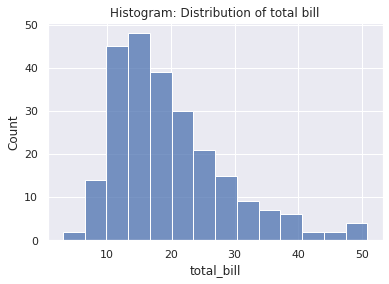

In [16]:
# Histogram: used to analyze ONE numerical feature at a time
sns.histplot(tips['total_bill'])
plt.title('Histogram: Distribution of total bill')
plt.show()

- The histogram displays the distribution of total bill amounts across the dataset.
- Each bar on the plot represents a range or bin of total bill amounts, and the height of the bar corresponds to the frequency of occurrences within that range.
- The data is right-skewed, which means the mode, median, and mean are arranged, respectively.
- Based on the chart, you can infer that most of the total bills lie in the 10 to 20 range.

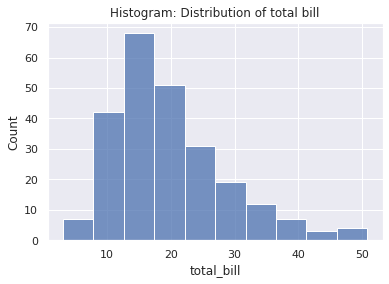

In [20]:
# Histogram: used to analyze ONE numerical feature at a time
# Use 10 bins
sns.histplot(tips['total_bill'],bins=10)
plt.title('Histogram: Distribution of total bill')
plt.show()

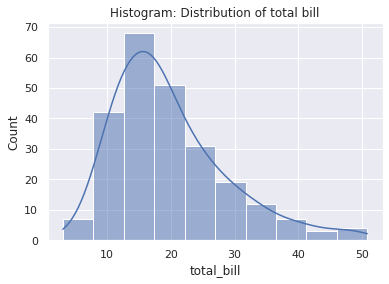

In [21]:
# Histogram with kernel density estimation (kde)
sns.histplot(tips['total_bill'],bins=10,kde=True)
plt.title('Histogram: Distribution of total bill')
plt.show()

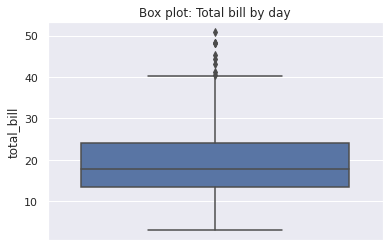

In [22]:
# Box Plot: Total bill: used to analyze ONE numerical feature at a time
sns.boxplot(data=tips,y='total_bill')
plt.title('Box plot: Total bill by day')
plt.show()

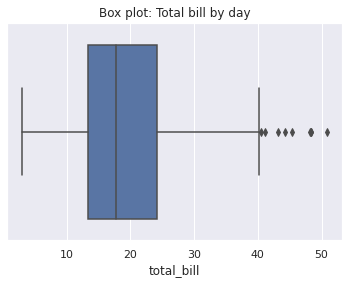

In [23]:
# Box Plot: Total bill: used to analyze ONE numerical feature at a time
sns.boxplot(data=tips,x='total_bill')
plt.title('Box plot: Total bill by day')
plt.show()

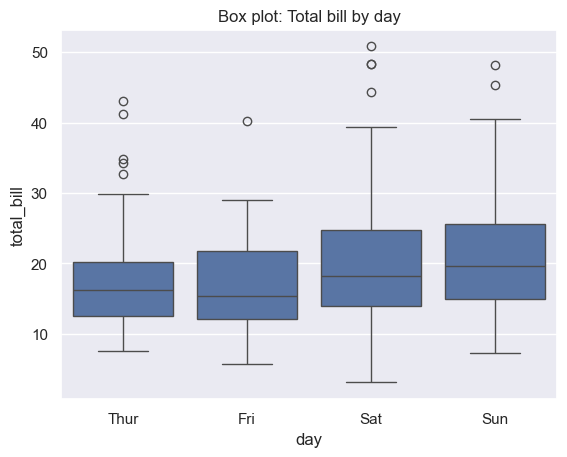

In [18]:
# Box Plot: Total bill vs. day: used to compare ONE numerical feature (total bill) and ONE categorical feature (day)
sns.boxplot(data=tips,x='day',y='total_bill')
plt.title('Box plot: Total bill by day')
plt.show()

- By examining the box plot, you can identify the central tendency and spread of total bill amounts for each day of the week.
- The length of the box provides insights into the variability of total bill amounts, with longer boxes indicating greater variability.
- The position of the median line within each box helps you compare the typical bill amounts across different days.
- You can see that the median on Saturday and Sunday is significantly higher than on Thursday and Friday.
- The appearance of data points beyond the whiskers indicates the presence of outliers within the dataset.

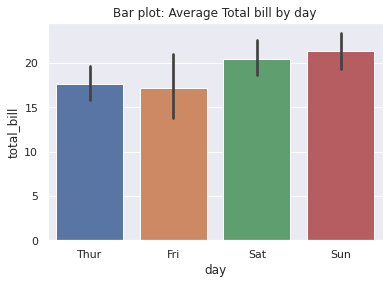

In [25]:
# Bar Plot: Average total_bill for each day
sns.barplot(data=tips,x='day',y='total_bill')
plt.title('Bar plot: Average Total bill by day')
plt.show()

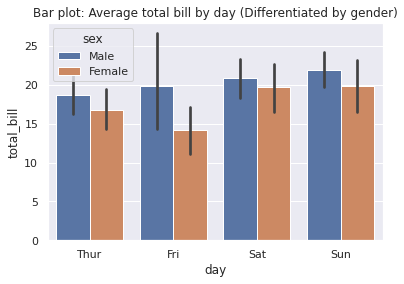

In [26]:
# Bar Plot: Total bill vs. day, differentiated by gender
sns.barplot(data=tips,x='day',y='total_bill',hue='sex')
plt.title('Bar plot: Average total bill by day (Differentiated by gender)')
plt.show()

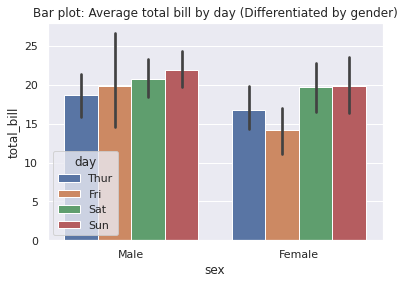

In [27]:
# Other example
# Bar Plot: Total bill vs. day, differentiated by gender
sns.barplot(data=tips,x='sex',y='total_bill',hue='day')
plt.title('Bar plot: Average total bill by day (Differentiated by gender)')
plt.show()

- The bar plot facilitates a comparison of average total bill amounts across different days of the week while also considering the gender factor.
- Based on the chart, you can see that there is a disparity in spending patterns between males and females.
- This disparity is even more pronounced on Thursday and Friday as compared to Saturday and Sunday.
- Error bars provide a visual indication of the spread of data points around the mean value for each category in the plot.

## __3. Violin Plot__
A violin plot merges the features of kernel density plots and box plots to show a numerical variable's distribution across categories.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/violin_plot.png)

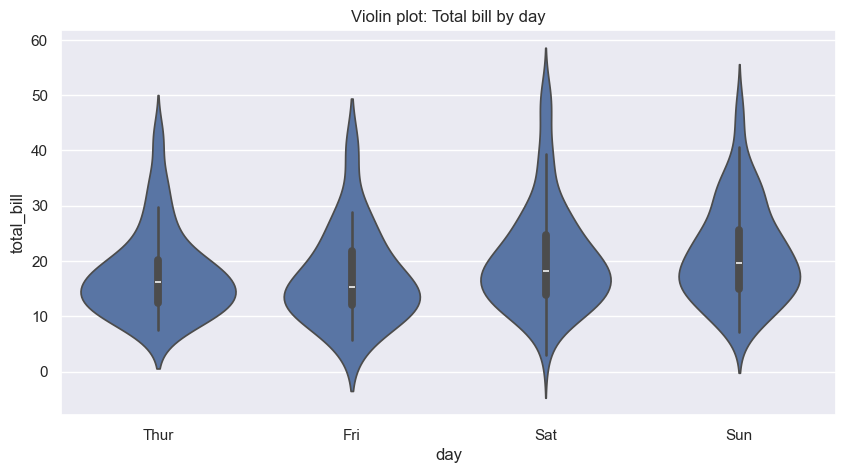

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
tips = sns.load_dataset('tips')

plt.figure(figsize=(10,5))

# Violin Plot: Total bill vs. day: used to compare ONE numerical feature (total bill) and ONE categorical feature (day)
sns.violinplot(data=tips,x='day',y='total_bill')
plt.title('Violin plot: Total bill by day')
plt.show()

In a violin plot:

- The thick black line in the center represents the median.
- The white dot inside the violin represents the mean.
- The width of the violin at any given point represents the density of the data at that value. Wider sections indicate a higher density of data points.
- The lines extending from the violin, known as whiskers, represent the rest of the distribution outside the interquartile range.
- Any points beyond the whiskers are considered outliers and are plotted individually.

This plot helps you visualize the distribution of total bills for each day, highlighting data point densities and key statistical measures such as the median and interquartile range.

## __4. Pair Plot:__

A pair plot displays the pairwise relationships between numerical variables in a dataset through scatter plots and distributions, differentiating categories using colors.
- It is useful for understanding how different numerical variables relate to each other and how these relationships vary based on gender ('sex' variable in this case).

In [20]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


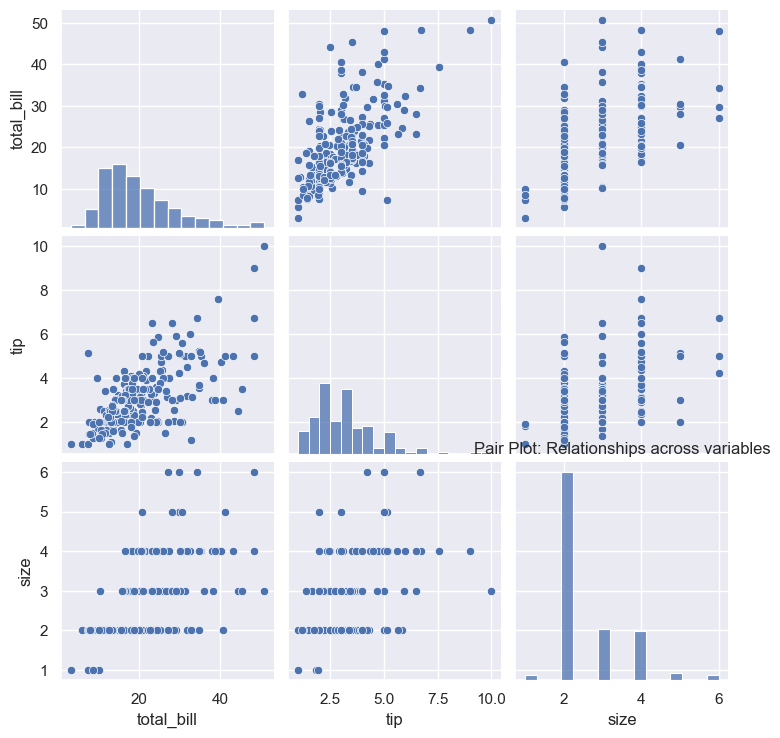

In [21]:
# Pair Plot: ONLY PLOT NUMERICAL VARIABLES
sns.pairplot(tips)
plt.title('Pair Plot: Relationships across variables')
plt.show()

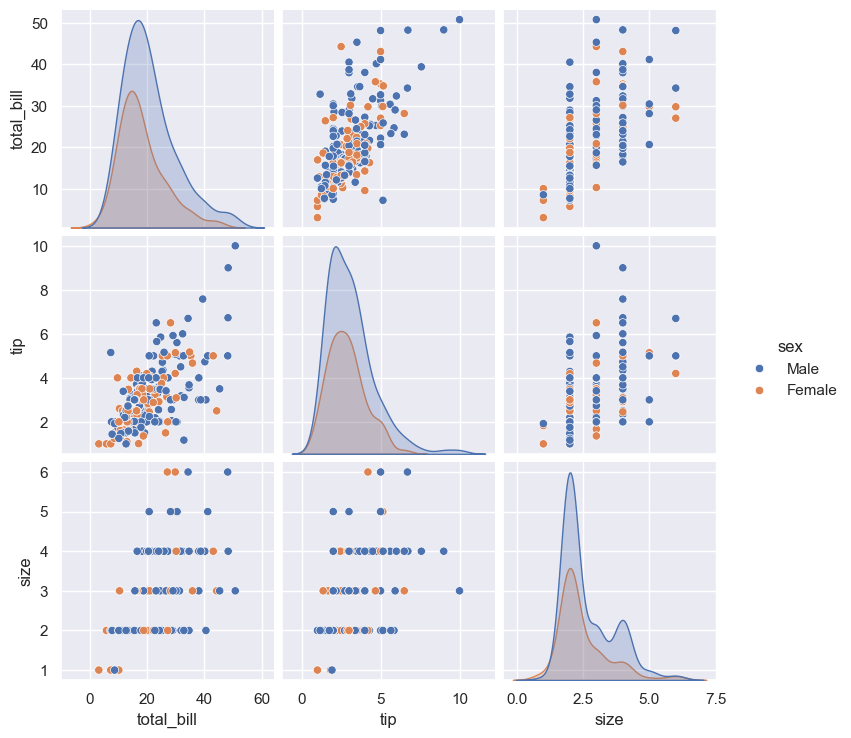

In [22]:
# Pair Plot, differentiated by gender
sns.pairplot(tips,hue='sex')
plt.show()

- The above plot shows spending behavior by gender.
- The total bill for males is higher than for females.
- Males have paid more tips than females.

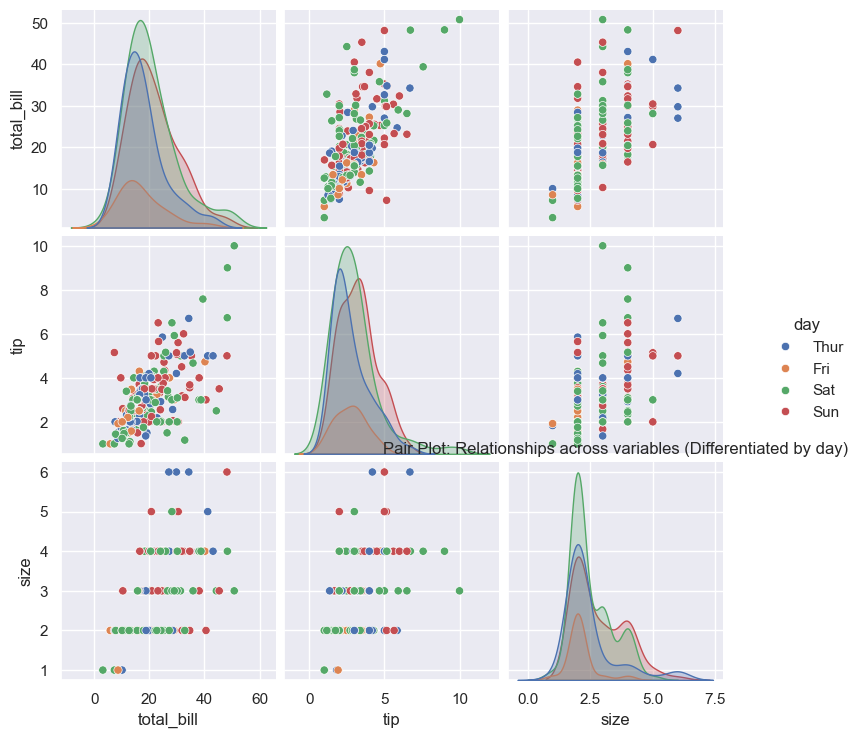

In [23]:
# Pair Plot, differentiated by day
sns.pairplot(tips,hue='day')
plt.title('Pair Plot: Relationships across variables (Differentiated by day)')
plt.show()

## __5. Heatmap:__

A heatmap visualizes the correlation matrix of numerical variables in a dataset, using color gradations to represent the strength and direction of correlations.

- It allows for the quick identification of relationships between variables, with warmer colors indicating stronger correlations and cooler colors indicating weaker or negative correlations.

In [24]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [25]:
# Heatmap
correlation_matrix = tips[["total_bill", "tip", "size"]].corr()
correlation_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


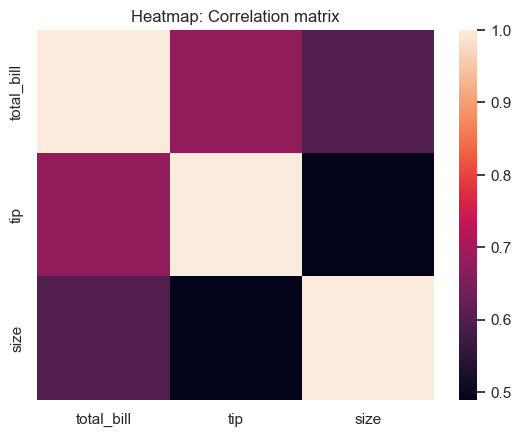

In [26]:
# Heatmap
sns.heatmap(correlation_matrix)
plt.title('Heatmap: Correlation matrix')
plt.show()

- The pairs with high correlation values are shown in warmer colors.
- The pairs with low correlation values are shown in cooler colors.

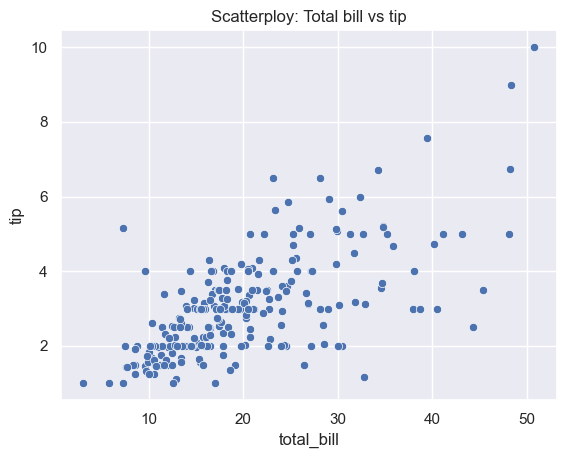

In [29]:
# Scatterplot
sns.scatterplot(data=tips,x='total_bill',y='tip')
plt.title('Scatterploy: Total bill vs tip')
plt.show()

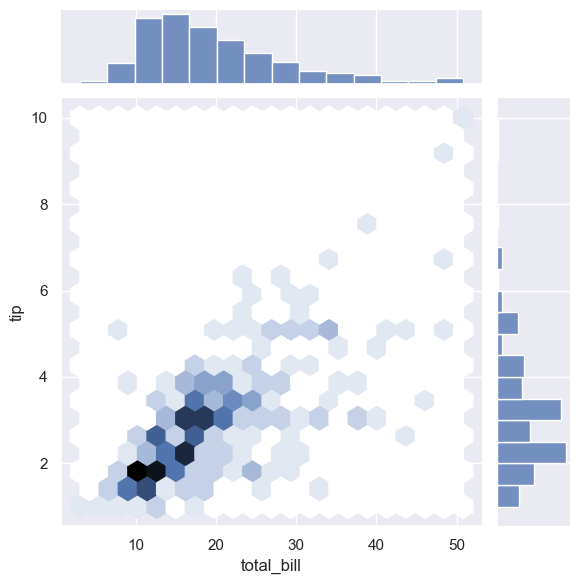

In [43]:
joint = sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex', gridsize=20)

## __6. Joint Plot__

A joint plot reveals the bivariate distribution of two numerical variables using hexagonal bins to represent point density.
- It is a type of plot in data visualization that combines multiple plots to show the relationship between two variables in a dataset.
- It typically includes a scatterplot to visualize the individual data points and additional information such as histograms, kernel density estimates, or regression lines to provide more context about the distribution.


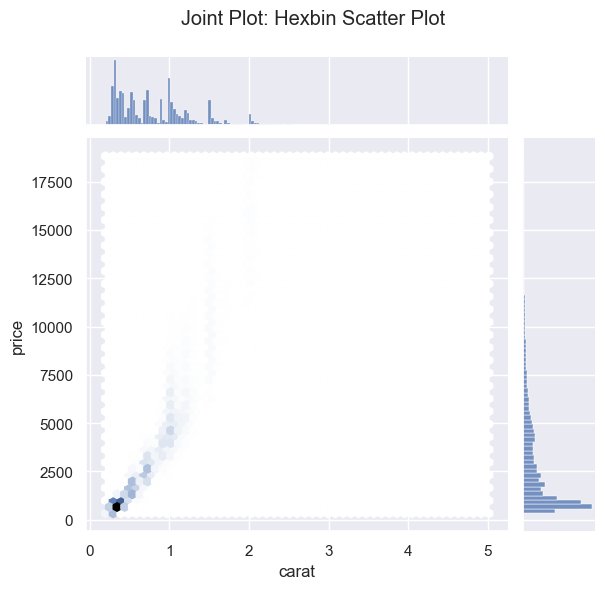

In [44]:

import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Create a Joint Plot
joint = sns.jointplot(data=diamonds, x='carat', y='price', kind='hex')

# Adjust the title position
plt.subplots_adjust(top=0.9)

# Set the title for the figure
joint.figure.suptitle('Joint Plot: Hexbin Scatter Plot')

plt.show()

In [ ]:
# Create a Joint Plot: tip vs. total bill: plot TWO numerical variables; it is an extension of a scatterplot
joint = sns.jointplot(data=tips, x='total_bill',y='tip',kind='hex')
# Adjust the title position
plt.subplots_adjust(top=0.9)  # Adjust the top space to make room for the title
# Set the title for the figure
joint.figure.suptitle('Joint Plot: Hexbin Scatter Plot')
plt.show()

- The joint plot shows the relationship between __total_bill__ and __tip__ using hexagonal bins to represent the data density.
- Based on the plot, you can infer that for the total bill, the density of the data is high in the 10 to 20 range.
- You can also infer that for the tips, the density of the data is high in the 1 to 3 range.

## __7. Swarm Plot__

A swarm plot is a categorical scatter plot that arranges individual data points without overlapping.
- It is useful for visualizing the distribution of total_bill across different days. Each point represents an individual entry.
- It helps identify patterns and concentrations without losing granularity due to point overlap.

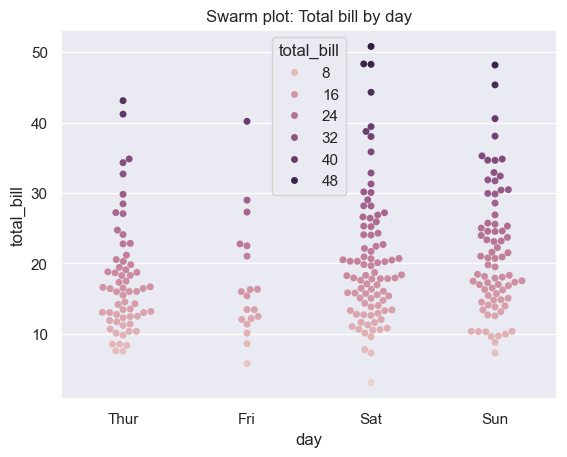

In [54]:
# Swarm Plot: scatter plot for each day: used to compare ONE numerical feature (total bill) and ONE categorical feature (day)
sns.swarmplot(data=tips, x='day', y='total_bill', hue='total_bill')
plt.title('Swarm plot: Total bill by day')
plt.show()

- The swarm plot allows you to visually compare the distribution of petal lengths across different species of iris flowers: Setosa, Versicolor, and Virginica.
- You can observe the range of petal lengths within each species category by examining the spread of points along the y-axis.
- The spread of petal lengths for Setosa falls within the range of 1 to 2. For Versicolor, it falls within the range of 3 to 5. For Virginica, it ranges from 4.5 to 7.

In [3]:
#
import seaborn as sns
import matplotlib.pyplot as plt
# Load the iris dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


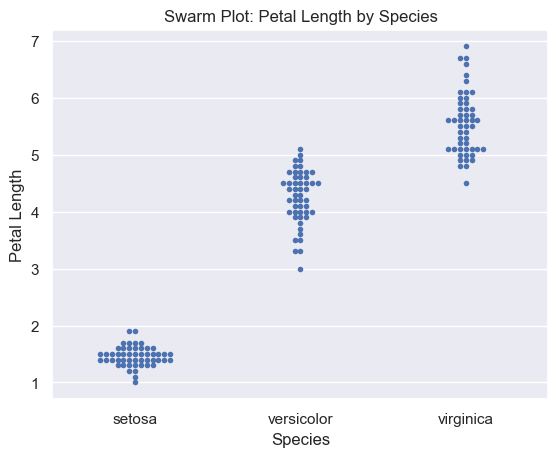

In [62]:
sns.swarmplot(data=iris, x='species', y='petal_length', size=4)
plt.title('Swarm Plot: Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.show()

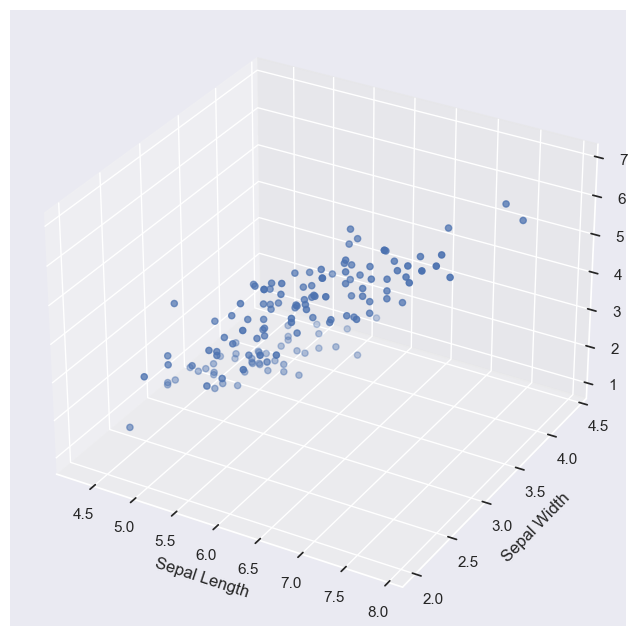

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# Load an example dataset
iris = sns.load_dataset('iris')
# Create a 3D scatter plot
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['sepal_length'], iris['sepal_width'], iris['petal_length'])
# Set labels
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
# Show the plot
plt.show()

## __8. Plotting 3D Graphs for Multiple Columns Using Seaborn__

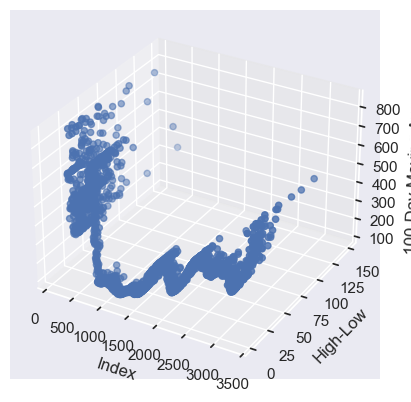

In [67]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into DataFrame, parsing dates
df = pd.read_csv('../data/ADANIPORTS.csv', parse_dates=True)

# Calculate 'High-Low' and '100-Day Moving Average'
df['H-L'] = df.High - df.Low
df['100MA'] = df['Close'].rolling(100).mean()

# Set Seaborn style to 'darkgrid'
sns.set_style('darkgrid')

# Plotting a 3D Graph: 100MA vs. H-L vs. index of the df
ax = plt.axes(projection='3d')
ax.scatter(df.index,df['H-L'],df['100MA'])

# Set labels for each axis
ax.set_xlabel('Index')
ax.set_ylabel('High-Low')
ax.set_zlabel('100-Day Moving Average')

# Display the 3D scatter plot
plt.show()

- 3D graphs provide additional depth perception, which may aid in understanding complex relationships in three-dimensional space.
- 3D plots can visualize relationships between three variables simultaneously, which might be challenging to represent accurately in a 2D plot.
- Based on this plot, you can see the distribution of data based on sepal length, sepal width, and petal length.

### __Plot a 3D Spiral Graph__

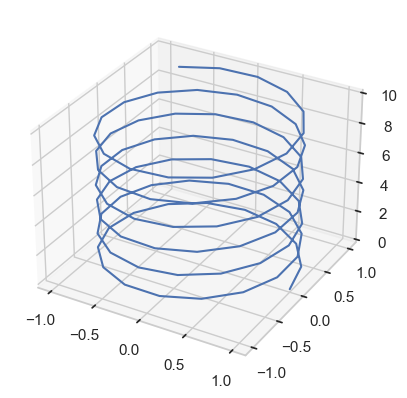

In [70]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate 3D data
z1 = np.linspace(0, 10, 100)
x1 = np.cos(4 * z1)
y1 = np.sin(4 * z1)

# Set Seaborn style to whitegrid
sns.set_style('whitegrid')

# Create a 3D axes
ax = plt.axes(projection='3d')

# Plot the 3D curve: z1 vs. y1 vs. x1
ax.plot(x1,y1,z1)

# Display the 3D plot
plt.show()

- The resulting chart is a 3D plot of a helix that looks like a spring.
- The x and y coordinates trace a circular path in the x-y plane, while the z coordinate increases linearly.

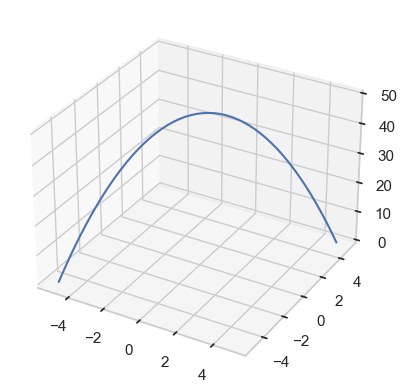

In [71]:
# Define a function to compute z values based on x and y
def return_z(x, y):
    return 50 - (x**2 + y**2)

# Set Seaborn style to whitegrid
sns.set_style('whitegrid')

# Generate 2D grid of x and y values
x1, y1 = np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)

# Compute z values using the defined function
z1 = return_z(x1, y1)

# Create a 3D axes
ax = plt.axes(projection='3d')

# Plot the 3D surface: z1 vs. y1 vs. x1
ax.plot(x1,y1,z1)

# Display the 3D plot
plt.show()

### __Create 3D Surface Using Seaborn__


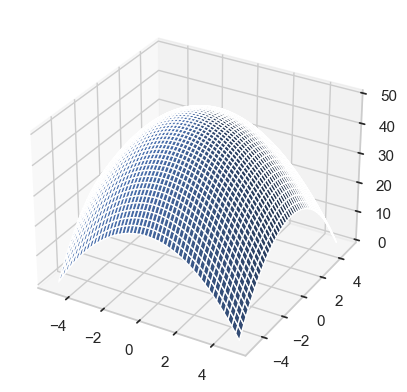

In [72]:
# Define a function to compute z values based on x and y
def return_z(x, y):
    return 50 - (x**2 + y**2)

# Set Seaborn style to whitegrid
sns.set_style('whitegrid')

# Generate 2D grid of x and y values
x1, y1 = np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)
x1, y1 = np.meshgrid(x1, y1)

# Compute z values using the defined function
z1 = return_z(x1, y1)

# Create a 3D axes
ax = plt.axes(projection='3d')

# Plot the 3D surface: z1 vs. y1 vs. x1
ax.plot_surface(x1,y1,z1)

# Display the 3D plot
plt.show()

- The resulting chart is a 3D surface plot of a paraboloid shape.
- The surface is curved upwards, with the highest point at the center (x=0, y=0) and the height (z value) decreasing as the distance from the center increases.

## __Introduction to Plotly__
Plotly is a versatile and interactive data visualization library in Python that enables the creation of interactive and web-based visualizations.
- It allows users to create a wide range of charts, graphs, and dashboards for exploratory data analysis and presentation purposes.
- It supports both static and dynamic visualizations and is particularly well-suited for creating interactive plots that can be embedded in web applications and notebooks.

In [2]:
import plotly.express as px

# Create a sample DataFrame
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [3]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
# Create a scatter plot: sepal_length vs. sepal_width; color=species, size of dots=petal_length
fig = px.scatter(df,x="sepal_width",y="sepal_length",color="species",size="petal_length")

# Show the interactive plot
fig.show()

In this scatterplot made using Plotly, you can hover over individual data points to see their values, zoom in and out, and pan across the plot.

### __Create Box Plot of Petal Length by Species__

In [5]:
# Create a box plot
fig = px.box(df, x="species", y="petal_length", title="Petal Length by Species",
             labels={'species': 'Species', 'petal_length': 'Petal Length'})

# Show the plot
fig.show()


### __Create Scatter Matrix of All Features Colored by Species__

In this boxplot made using Plotly, you can hover over each boxplot, and the given information will be displayed.

- maximum value
- minimum value
- first quartile (q1)
- third quartile (q3)

You can also zoom in to view individual plots.

- In Plotly, a scatter matrix (also known as a pair plot or a scatterplot matrix) is a plot that allows you to visualize the pairwise relationships between multiple variables in a dataset.
- It is used to quickly identify correlations, patterns, and trends among different variables.
- Each cell in the scatter matrix shows a scatter plot of two variables, with one variable represented on the x-axis and the other on the y-axis.
- The diagonal cells often display histograms or density plots of the individual variables.

In [9]:
# Create a scatter matrix
fig = px.scatter_matrix(df, dimensions=["sepal_length", "sepal_width", "petal_length", "petal_width"],
                        color="species", title="Scatter Matrix of Iris Features Colored by Species")

# Show the plot
fig.show()

- The scatter matrix visualizes the relationships between the sepal length, sepal width, petal length, and petal width of iris flowers, with different species colored differently.
- This allows for a quick visual assessment of how these variables correlate with each other and how they are distributed across different species.

### __Create a Heatmap to Show Correlation of Features__

- Heatmaps in Plotly are used for visualizing and analyzing data across two dimensions.
- They represent data using a grid of colored squares, where each square corresponds to a specific data point or cell in a dataset.
- The color of each square indicates the value of the data point, allowing for quick and intuitive interpretation of patterns, trends, and variations in the data.

In [8]:
import plotly.graph_objects as go
import seaborn as sns
iris = sns.load_dataset('iris')
# Calculate the correlation matrix
correlation_matrix = iris.select_dtypes(include='number').corr()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.index,
                   colorscale='Blues'))

fig.update_layout(title='Correlation Heatmap of Iris Dataset Features',
                  xaxis_title='Features',
                  yaxis_title='Features')

# Show the plot
fig.show()

- The heatmap provides a visual representation of the correlation strength between different features (sepal length, sepal width, petal length, and petal width) of the iris dataset.
- There appears to be a negative correlation between sepal width and petal length, as indicated by the lighter shade of the corresponding heatmap cell.
- You can observe a strong positive correlation between petal length and petal width, as indicated by the darker shade of the corresponding heatmap cell.

## __Problem Statement:__
Analyze the housing dataset using various types of plots from the Seaborn and Plotly libraries to gain insights into the data.

# __Assisted Practice__

## __Problem Statement:__
Analyze the housing dataset using various types of plots from the Seaborn library to gain insights into the data.

## __Steps to Perform:__
- Create a violin plot for a feature like price, or price vs. condition to visualize its distribution and understand its characteristics.
- Use a box plot to visualize the distribution of price for each condition
- Use a pair plot to visualize the relationships between different numerical variables like sqft_lot, yr_built, and price.
- Create a heatmap of the correlation matrix to understand the relationships between different numerical features.
- Use a joint plot to visualize the relationship between two numerical variables and their individual distributions, for example, sqft_lot and price.
- Create a swarm plot for a categorical variable like city against price to understand the distribution of prices for each condition.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../data/HousePrices.csv',parse_dates=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


__Violin plot__

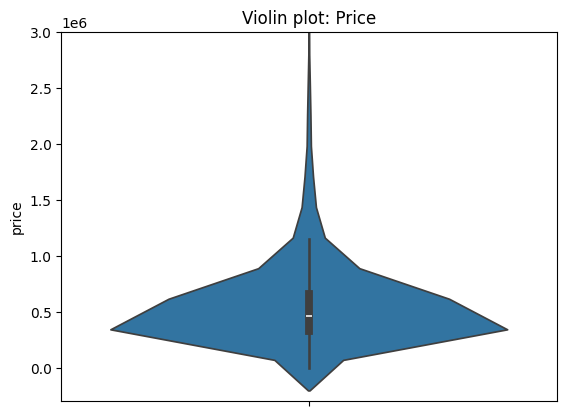

In [21]:
# Violin Plot: price
sns.violinplot(data=df,y='price')
plt.ylim(-300_000,3_000_000)
plt.title('Violin plot: Price')
plt.show()

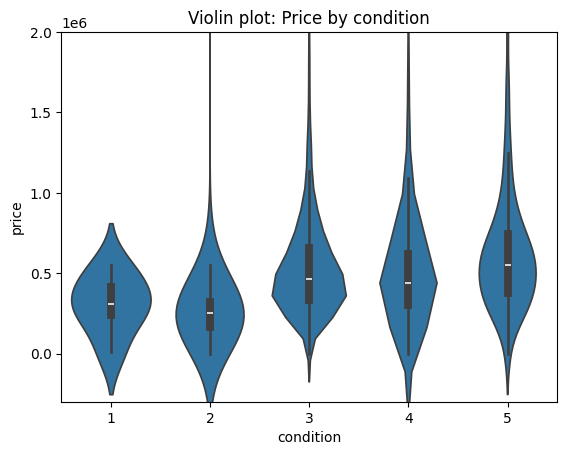

In [27]:
# Violin Plot: price by condition
sns.violinplot(data=df,x='condition',y='price')
plt.ylim(-300_000,2_000_000)
plt.title('Violin plot: Price by condition')
plt.show()


In [ ]:
# Violin Plot


__Box plot__

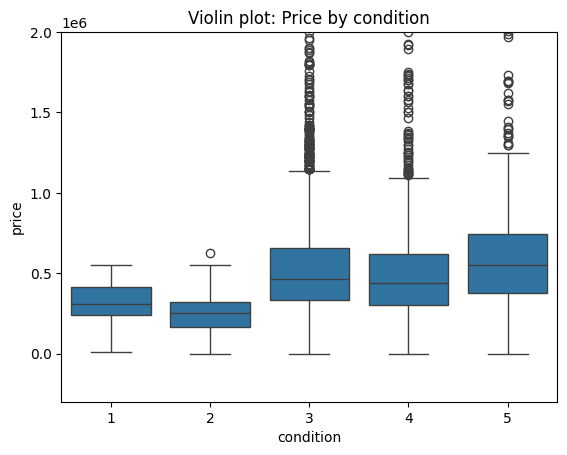

In [28]:
# Box Plot
# Violin Plot: price by condition
sns.boxplot(data=df, x='condition', y='price')
plt.ylim(-300_000, 2_000_000)
plt.title('Violin plot: Price by condition')
plt.show()

__Pair plot__

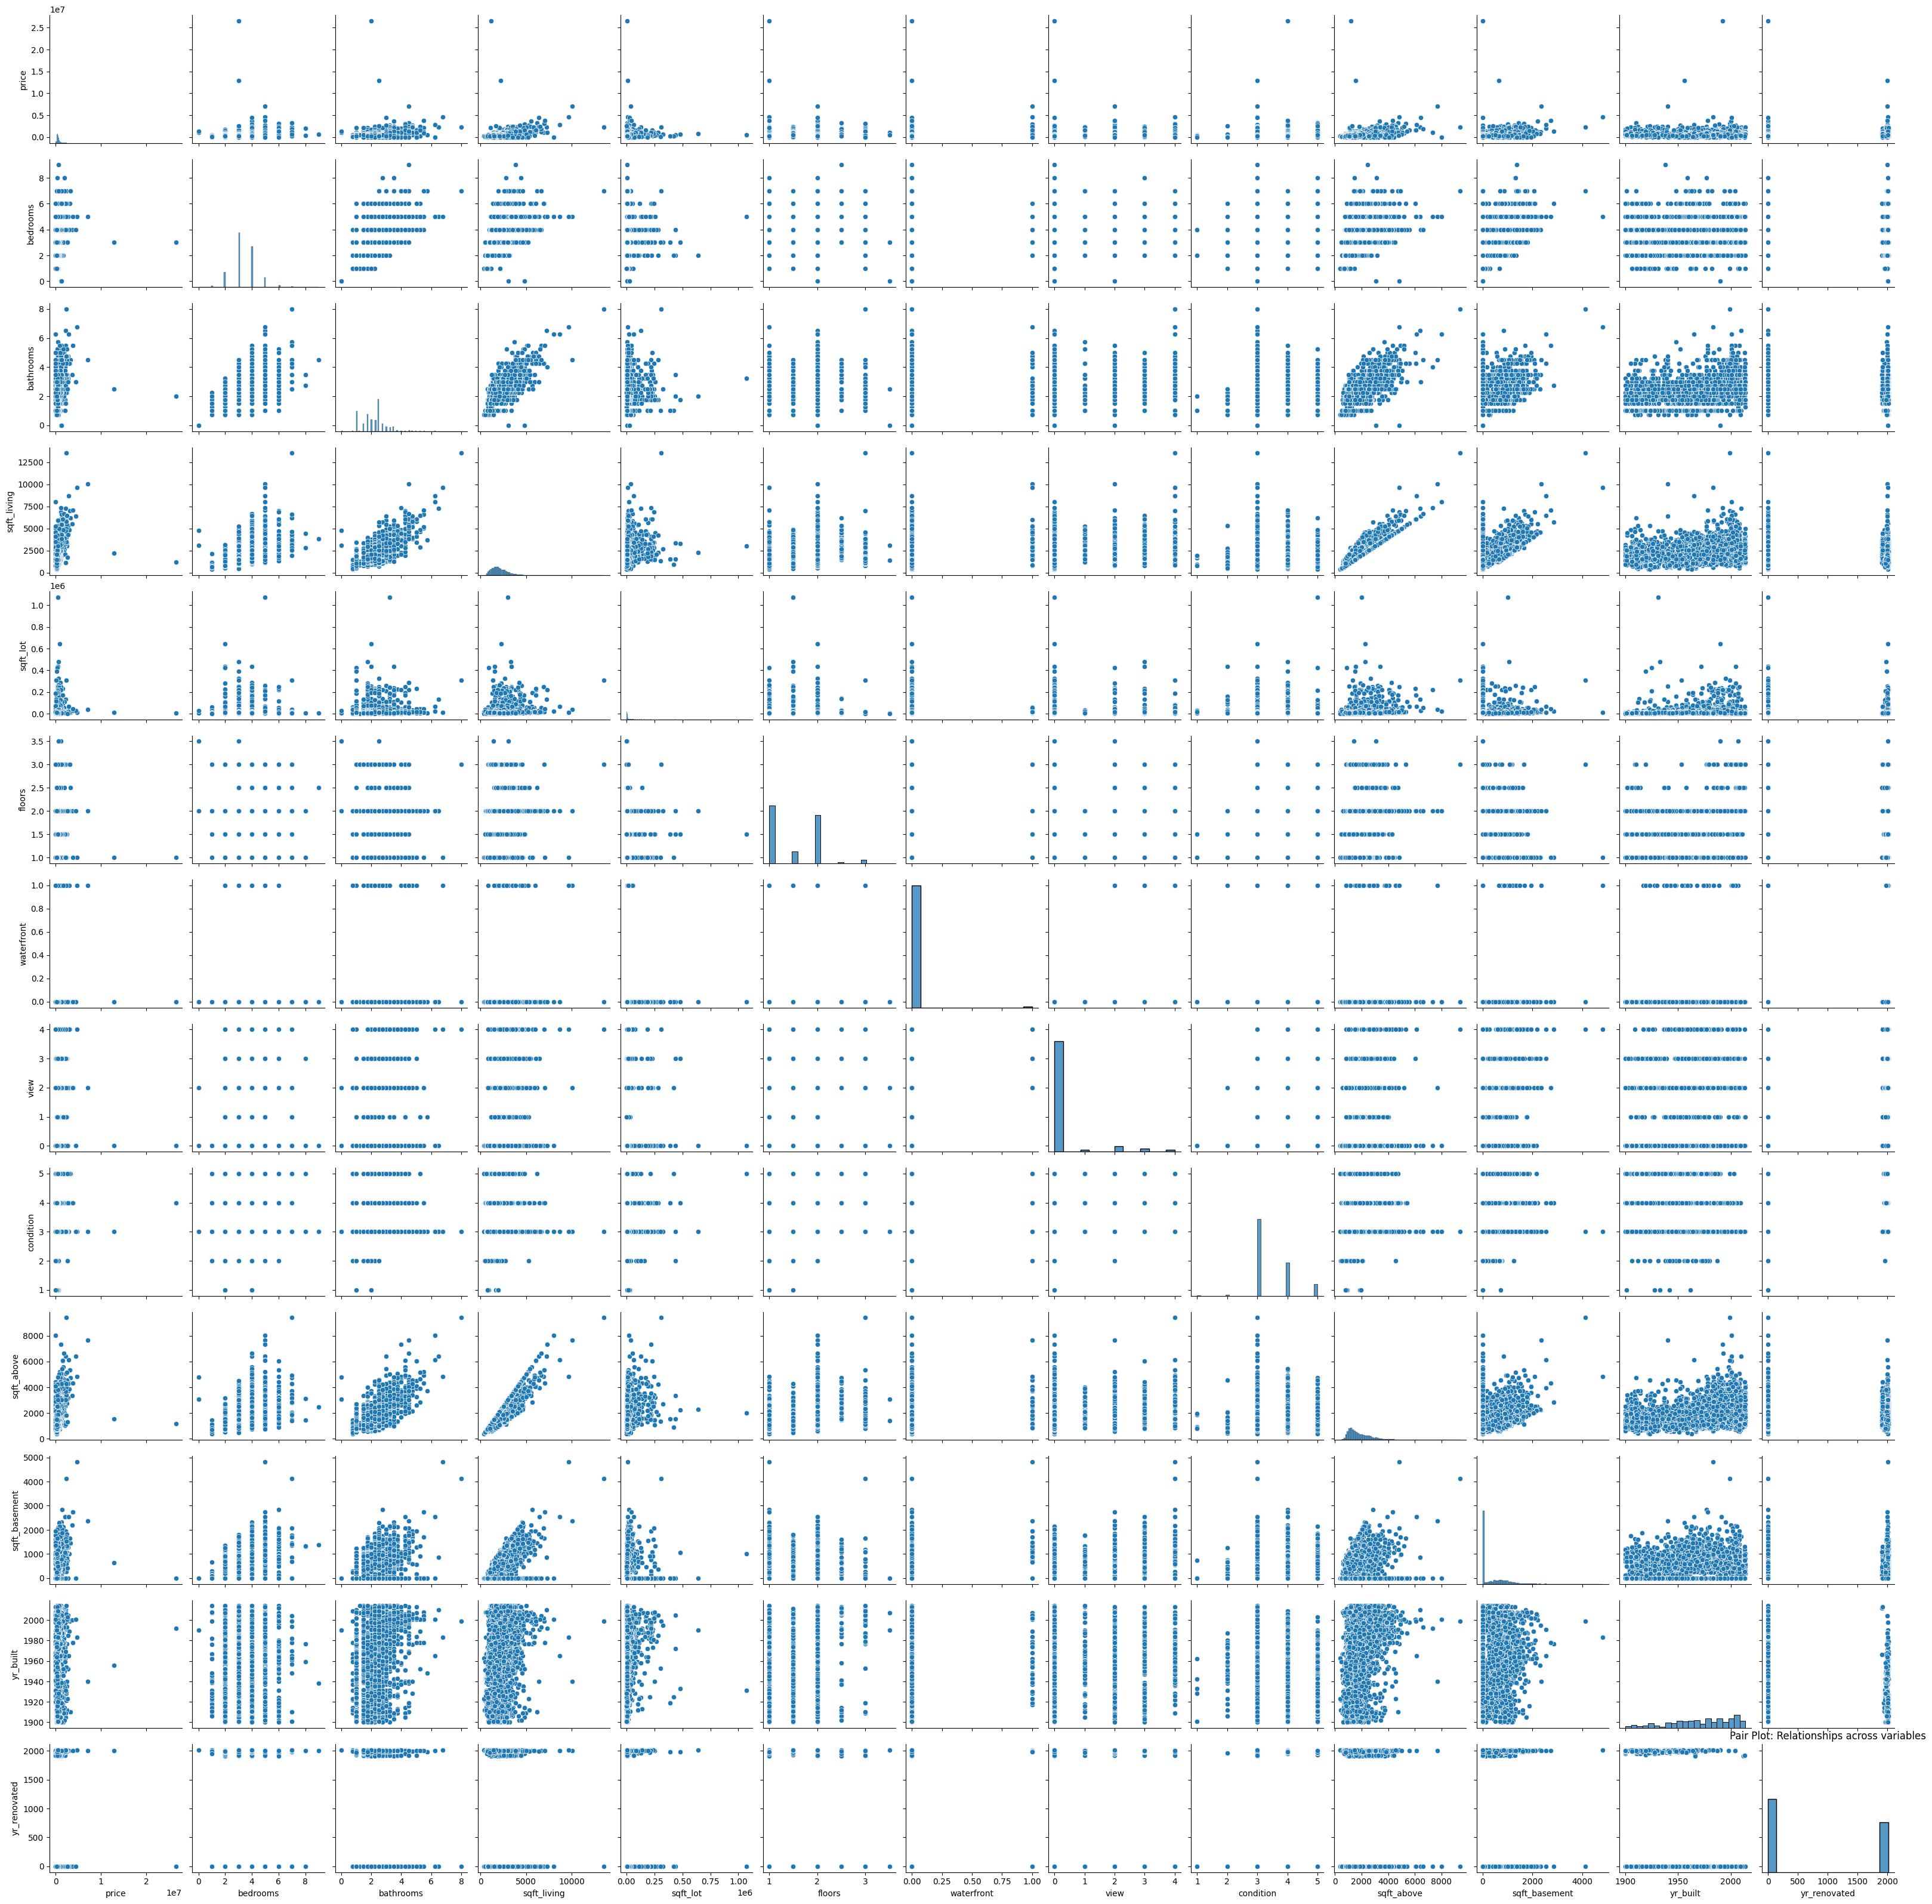

In [29]:
# Pair Plot
sns.pairplot(df)
plt.title('Pair Plot: Relationships across variables')
plt.show()

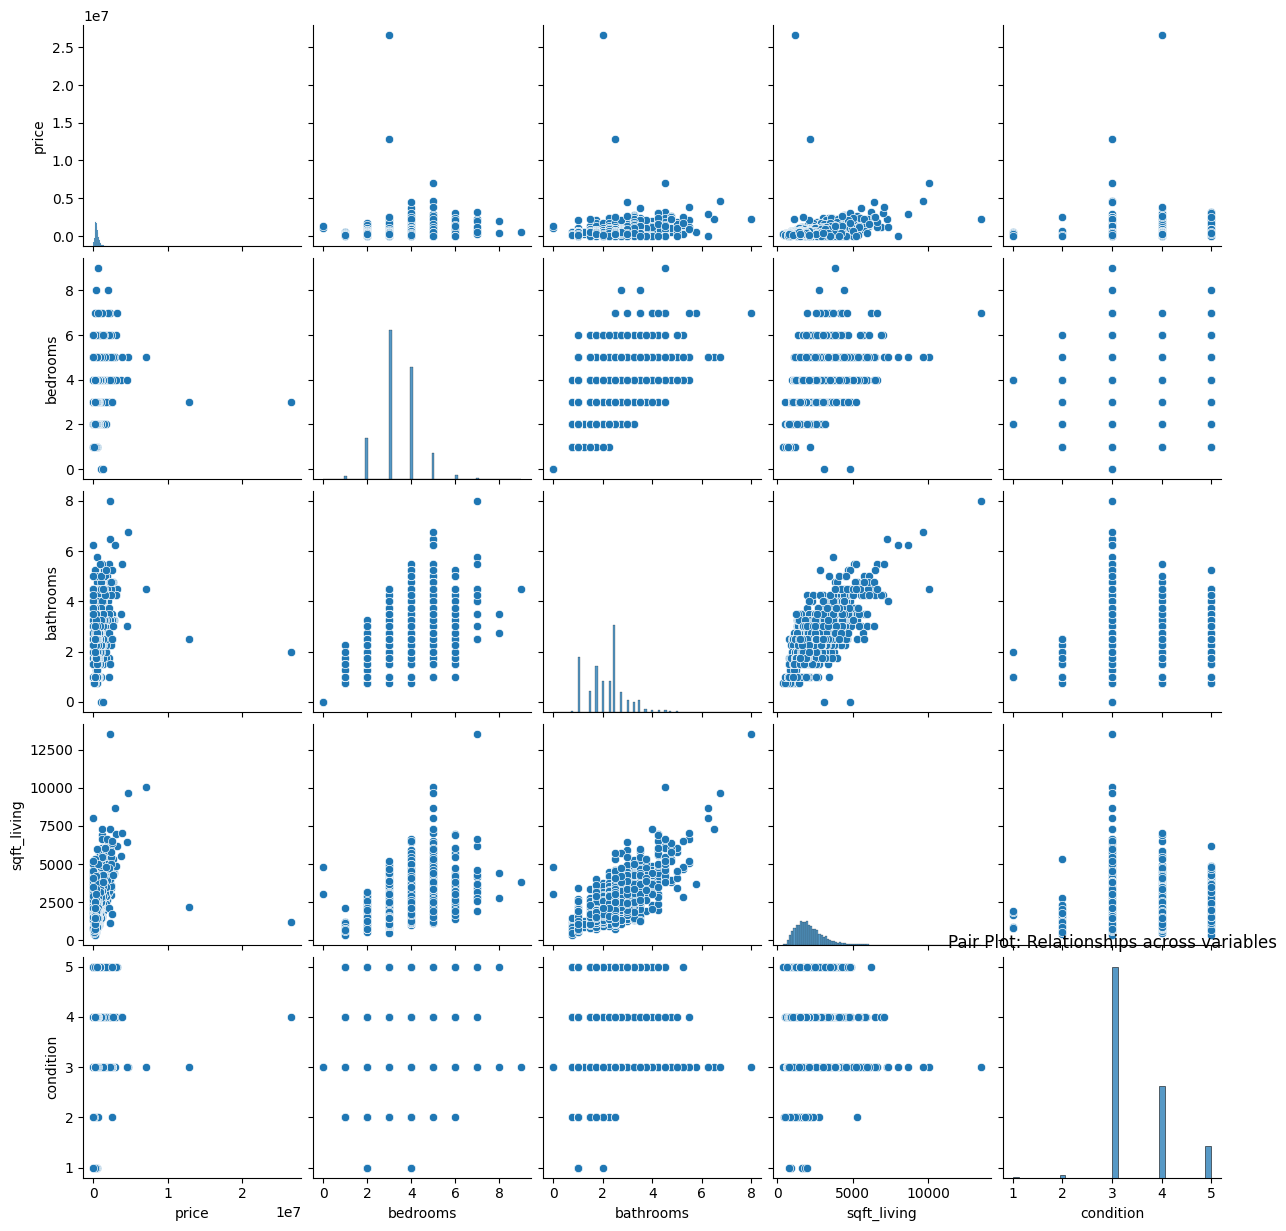

In [4]:
# Pair Plot
sns.pairplot(df[['price','bedrooms','bathrooms','sqft_living', 'condition']])
plt.title('Pair Plot: Relationships across variables')
plt.show()

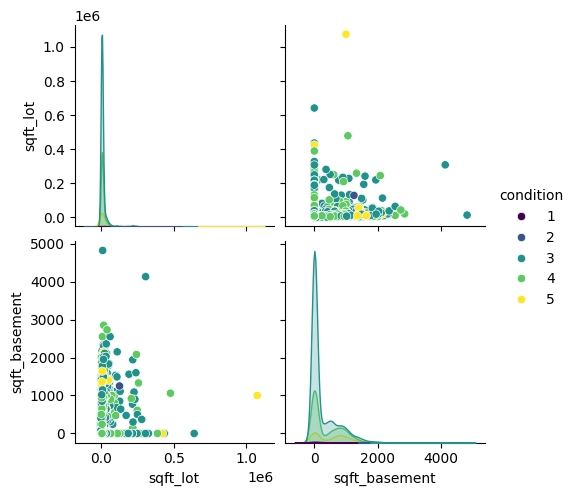

In [15]:
# Pair Plot
sns.pairplot(df[['sqft_lot', 'sqft_basement', 'condition']], hue='condition', palette='viridis')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

__Heat map__

In [20]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

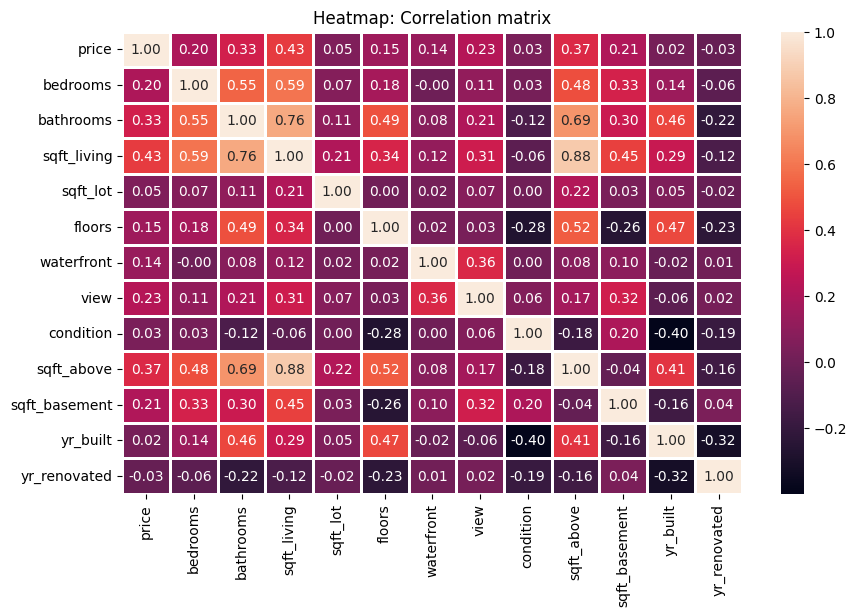

In [30]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,  annot=True, fmt='.2f', linewidths=2)
plt.title('Heatmap: Correlation matrix')
plt.show()

__Joint plot__

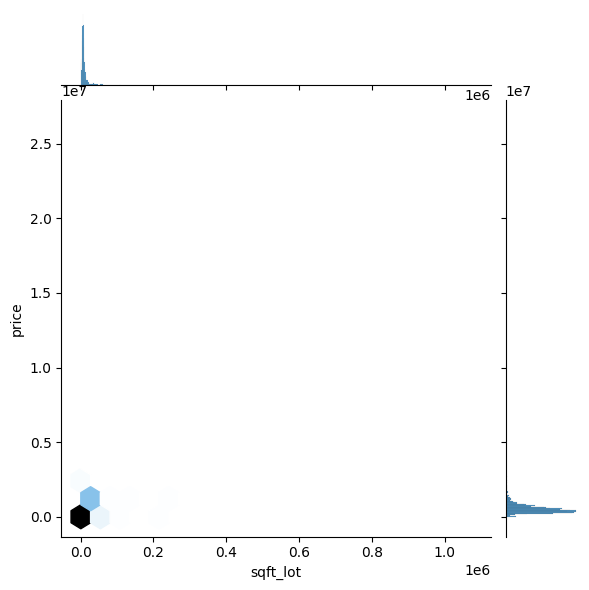

In [35]:
# Create a Joint Plot
sns.jointplot(data=df, x='sqft_lot', y='price', kind='hex', gridsize=20)
plt.show()

<Figure size 600x1000 with 0 Axes>

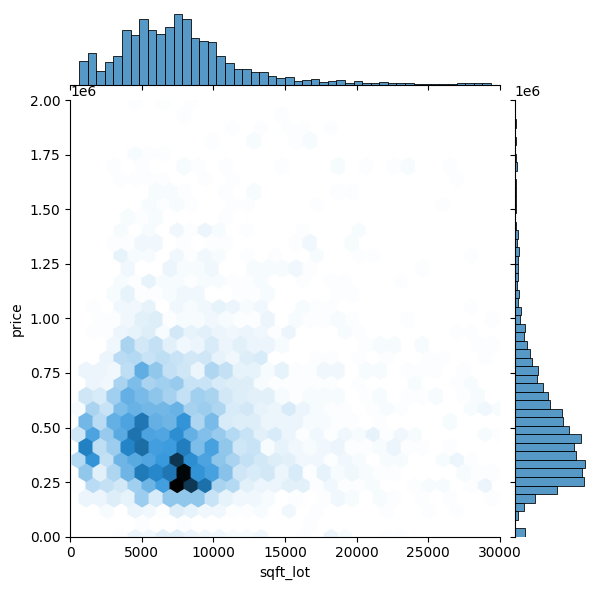

In [49]:
# Create a Joint Plot
plt.figure(figsize=(6, 10))
price_sqft = df[(df['sqft_lot']<30000) & (df['price']<2000000)]
sns.jointplot(data=price_sqft, x='sqft_lot', y='price', kind='hex', gridsize=30)
plt.xlim(0, 30000)
plt.ylim(0, 2000000)
plt.show()

In [ ]:
# Create a Joint Plot


__Swarm plot__

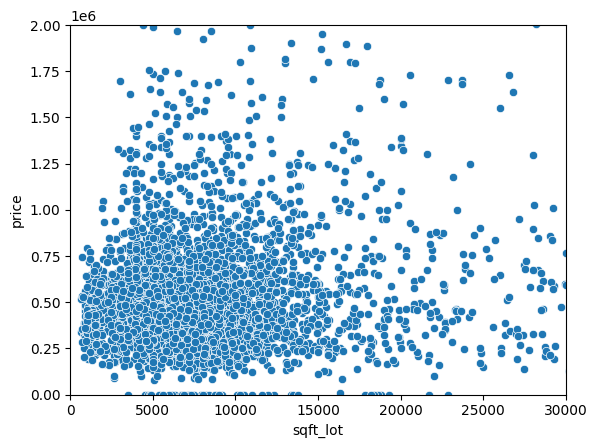

In [57]:
# Swarm Plot: scatter plot for each category
price_sqft = df[(df['sqft_lot'] < 30_000) & (df['price'] < 2_000_000)]
sns.scatterplot(data=df, x='sqft_lot', y='price')
plt.xlim(0, 30000)
plt.ylim(0, 2000000)
plt.show()

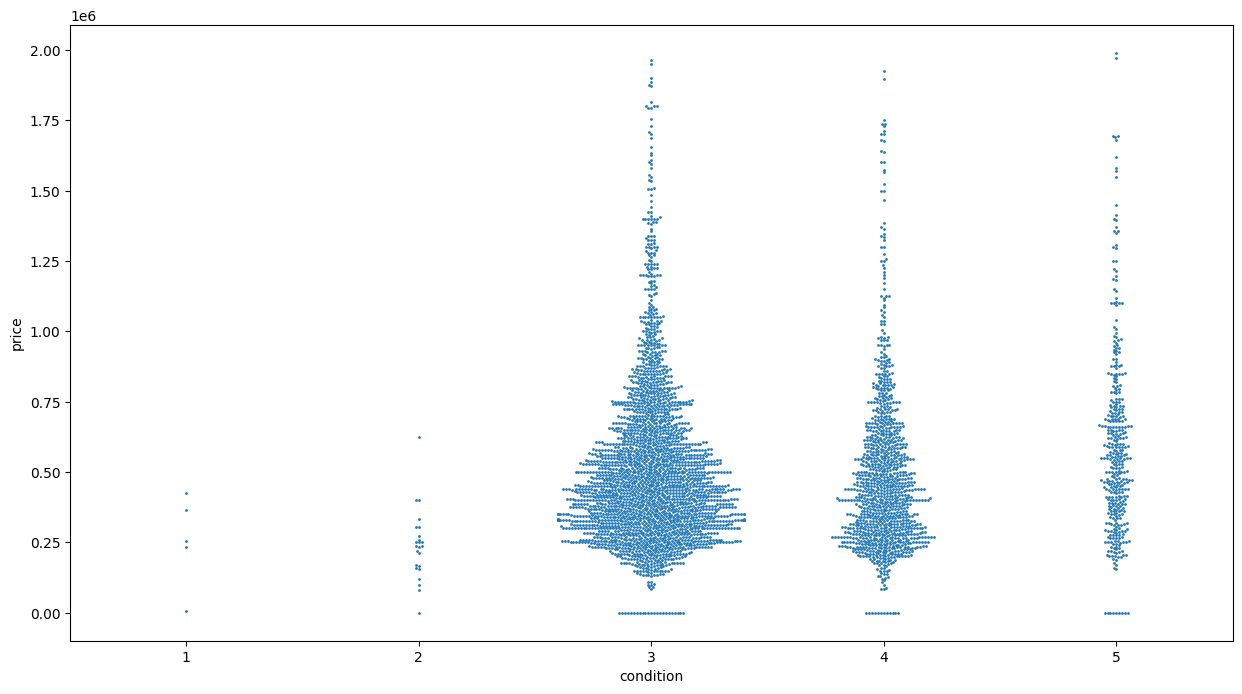

In [66]:
plt.figure(figsize=(15, 8))
sns.swarmplot(data=price_sqft, x='condition', y='price', size=2)
plt.show()